In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [8]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'jci'


df = pd.read_csv(f'data_{station}/{station}_output.csv')

cols = [col for col in df.columns]

df_copy = df[cols]
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy = df_copy.sort_values('date')
df_copy = df_copy.drop_duplicates(subset=['date'], keep='first')

df_copy.set_index('date', inplace=True)
df_copy = df_copy.loc['2005':]
df_copy.reset_index(inplace=True)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979243 entries, 0 to 979242
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   date            979243 non-null  datetime64[ns, UTC]
 1   identificacion  979243 non-null  int64              
 2   dir             979243 non-null  int64              
 3   dddstd          979243 non-null  int64              
 4   dddx            979243 non-null  int64              
 5   hr              979243 non-null  int64              
 6   prec            950569 non-null  float64            
 7   pres            916886 non-null  float64            
 8   temp            913956 non-null  float64            
 9   skt             950093 non-null  float64            
 10  vel             953367 non-null  float64            
 11  velx            953533 non-null  float64            
 12  qdato           979243 non-null  int64              
dtypes: datetime64[

In [9]:
columns_to_drop = ['identificacion', 'dddstd', 'dddx', 'velx']
new_order = ['date', 'temp', 'skt', 'dir', 'vel', 'hr', 'prec', 'pres']


df_copy = df_copy.drop(columns=columns_to_drop)
df_copy = df_copy.reindex(columns=new_order)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979243 entries, 0 to 979242
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    979243 non-null  datetime64[ns, UTC]
 1   temp    913956 non-null  float64            
 2   skt     950093 non-null  float64            
 3   dir     979243 non-null  int64              
 4   vel     953367 non-null  float64            
 5   hr      979243 non-null  int64              
 6   prec    950569 non-null  float64            
 7   pres    916886 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 59.8 MB


In [10]:
df_copy.head()

,date,temp,skt,dir,vel,hr,prec,pres
0,2005-01-01 00:00:00+00:00,1.3,1.6,204,2.1,66,0.0,985.7
1,2005-01-01 00:10:00+00:00,1.5,2.1,236,0.5,66,0.0,985.7
2,2005-01-01 00:20:00+00:00,1.4,2.0,246,2.1,67,0.0,985.7
3,2005-01-01 00:30:00+00:00,1.3,1.9,242,1.8,68,0.0,985.6
4,2005-01-01 00:40:00+00:00,1.3,1.8,234,1.2,68,0.0,985.7


In [11]:
num_cols = len(df_copy.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_copy.columns.drop('date')):
    print(col)
    ax.plot(df_copy['date'], df_copy[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [4]:
plt.savefig('figure_1.png')


<Figure size 640x480 with 0 Axes>

In [7]:
df_copy.tail()

,identificacion,ddd,dddstd,dddx,date,hr,lluv,pres,temp,ts,vel,velx,qdato
1907534,89064,196,74,208,2024-03-23 23:10:00+00:00,81,0.0,992.0,0.6,0.9,1.2,3.3,0
1907535,89064,196,25,200,2024-03-23 23:20:00+00:00,81,0.0,991.9,0.7,0.9,2.1,4.6,0
1907536,89064,200,24,235,2024-03-23 23:30:00+00:00,78,0.0,992.0,0.7,0.9,2.4,5.3,0
1907537,89064,251,47,274,2024-03-23 23:40:00+00:00,79,0.0,992.2,0.8,1.0,1.7,4.7,0
1907538,89064,192,70,198,2024-03-23 23:50:00+00:00,79,0.0,992.2,0.8,0.9,1.2,4.0,0


In [25]:
df_horapunto = df_copy[df_copy['date'].dt.minute == 0]
df_horapunto = df_horapunto.reset_index(drop=True)
df_horapunto.head(10)

,date,temp,skt,dir,vel,hr,prec,pres
0,1988-02-01 01:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
1,1988-02-01 02:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
2,1988-02-01 03:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
3,1988-02-01 04:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
4,1988-02-01 05:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
5,1988-02-01 06:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
6,1988-02-01 07:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
7,1988-02-01 08:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
8,1988-02-01 09:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN
9,1988-02-01 10:00:00+00:00,NaN,NaN,0,NaN,0,NaN,NaN


### Pasos opcionales

Dependiendo de dataset será necesario:
-Acumular la lluvia por horas.
-Inspeccionar y encontrar anomalías (por ejemplo, en las bases de españa han apuntado nulos como 0)

In [27]:

#! RESAMPLE de los valores de ddd,dddstd, dddx y hr.

df_horapunto['hr'] = df_horapunto['hr'].replace(0, np.nan)
df_horapunto['dir'] = df_horapunto['dir'].replace(0, np.nan)



In [28]:

#! SUMA DE LA LLUVIA

df_resampled_sum = df.copy()
if df_resampled_sum['date'].dtype != 'datetime64[ns]':
    df_resampled_sum['date'] = pd.to_datetime(df_resampled_sum['date'])

df_resampled_sum.set_index('date', inplace=True)
df_resampled_sum = df_resampled_sum.resample('H').sum(min_count=1)
df_resampled_sum.reset_index(inplace=True)

df_resampled_sum.head(10)

df_horapunto['prec'] = df_resampled_sum['prec']

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_20268\1155208774.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled_sum = df_resampled_sum.resample('H').sum()


In [29]:
df_horapunto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308885 entries, 0 to 308884
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    308885 non-null  datetime64[ns, UTC]
 1   temp    203232 non-null  float64            
 2   skt     177835 non-null  float64            
 3   dir     208336 non-null  float64            
 4   vel     210059 non-null  float64            
 5   hr      197864 non-null  float64            
 6   prec    308885 non-null  float64            
 7   pres    199995 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 18.9 MB


temp
skt
dir
vel
hr
prec
pres


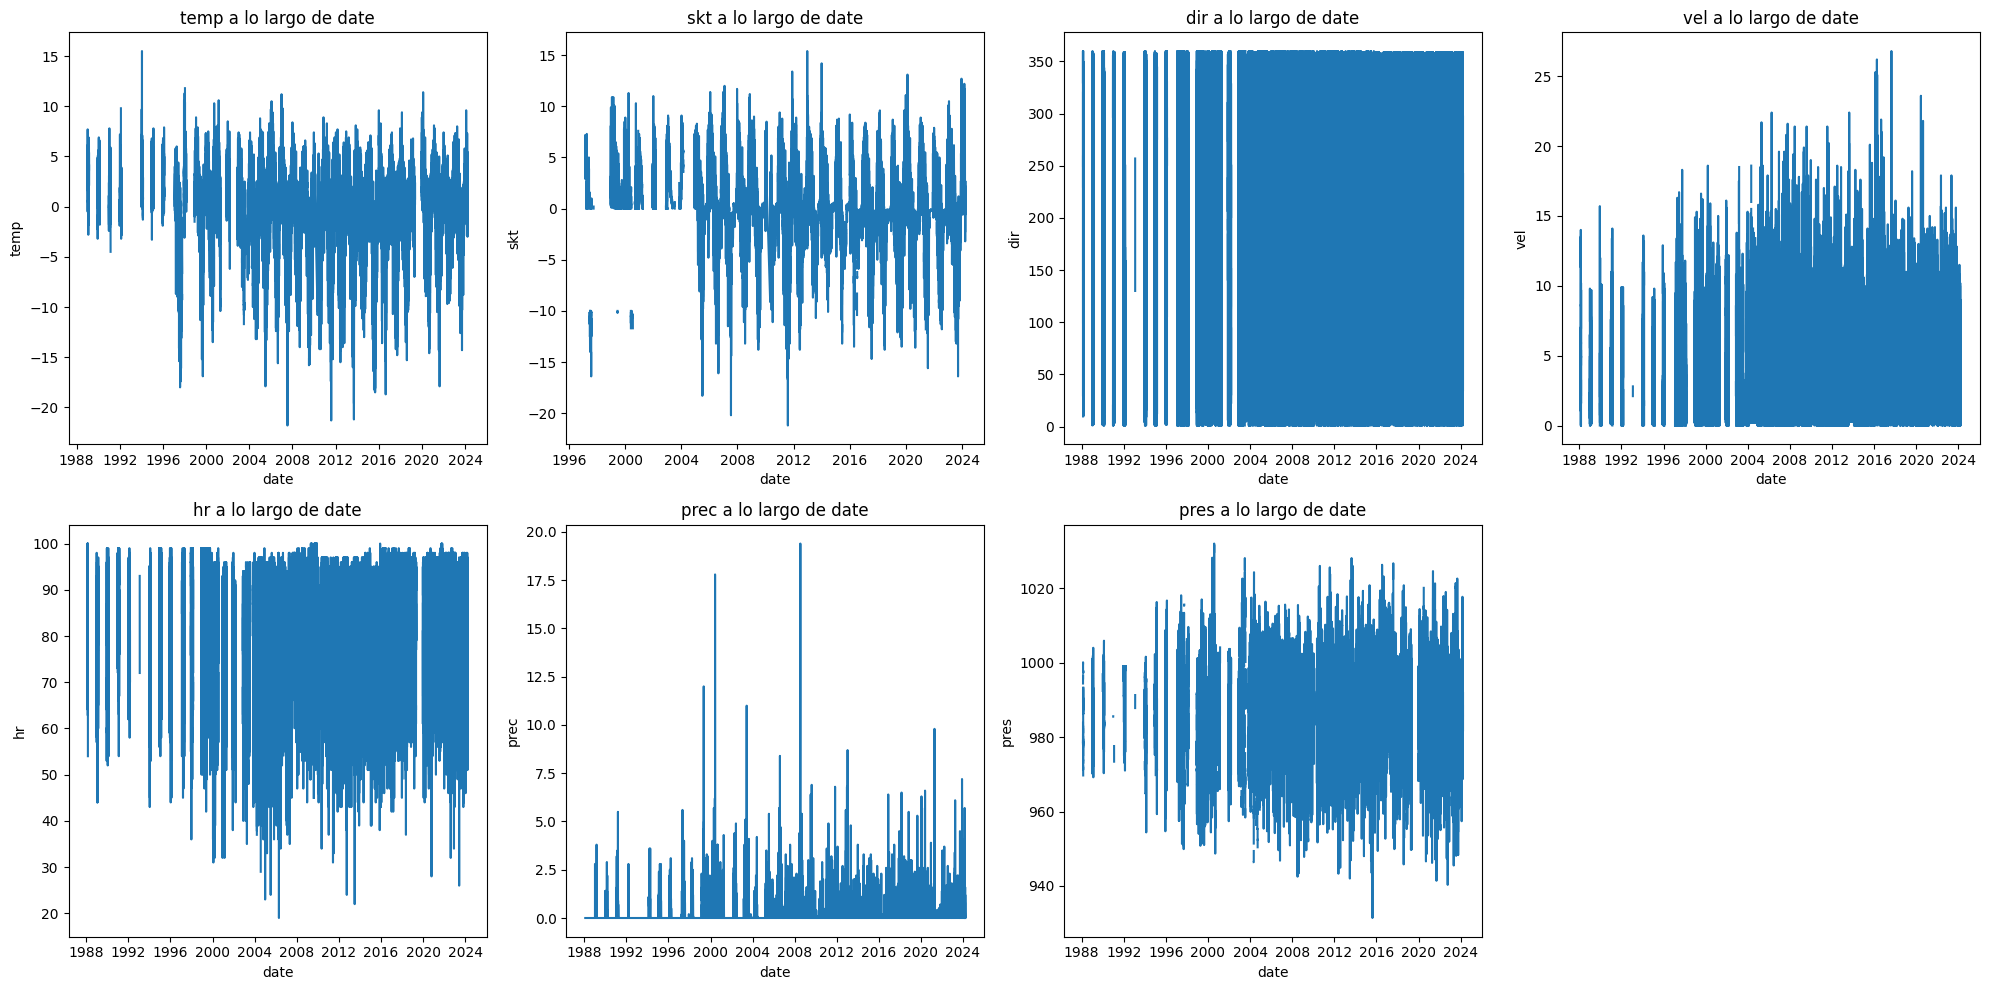

In [30]:



num_cols = len(df_horapunto.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_horapunto.columns.drop('date')):
    print(col)
    ax.plot(df_horapunto['date'], df_horapunto[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de date')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()

plt.savefig('figure_2.png')
plt.show()

In [32]:

df_horapunto.to_csv(f'data_{station}/{station}_clean.csv',  index=False)

In [31]:

df_horapunto.head()

,date,temp,skt,dir,vel,hr,prec,pres
0,1988-02-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1988-02-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1988-02-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,1988-02-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1988-02-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN


KeyboardInterrupt: 

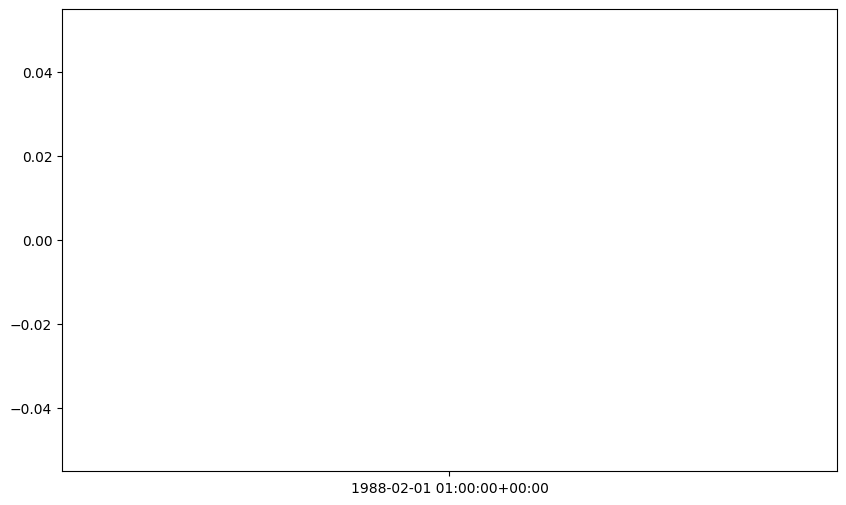

In [33]:

#! Asegúrate de que 'date' es una variable de fecha/hora
df_horapunto['date'] = pd.to_datetime(df_horapunto['date'])

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura a 10x6 pulgadas
sns.barplot(x='date', y='prec', data=df_horapunto)
plt.xlabel('Fecha')
plt.ylabel('Lluvia')
plt.title('Lluvia por fecha')
plt.show()

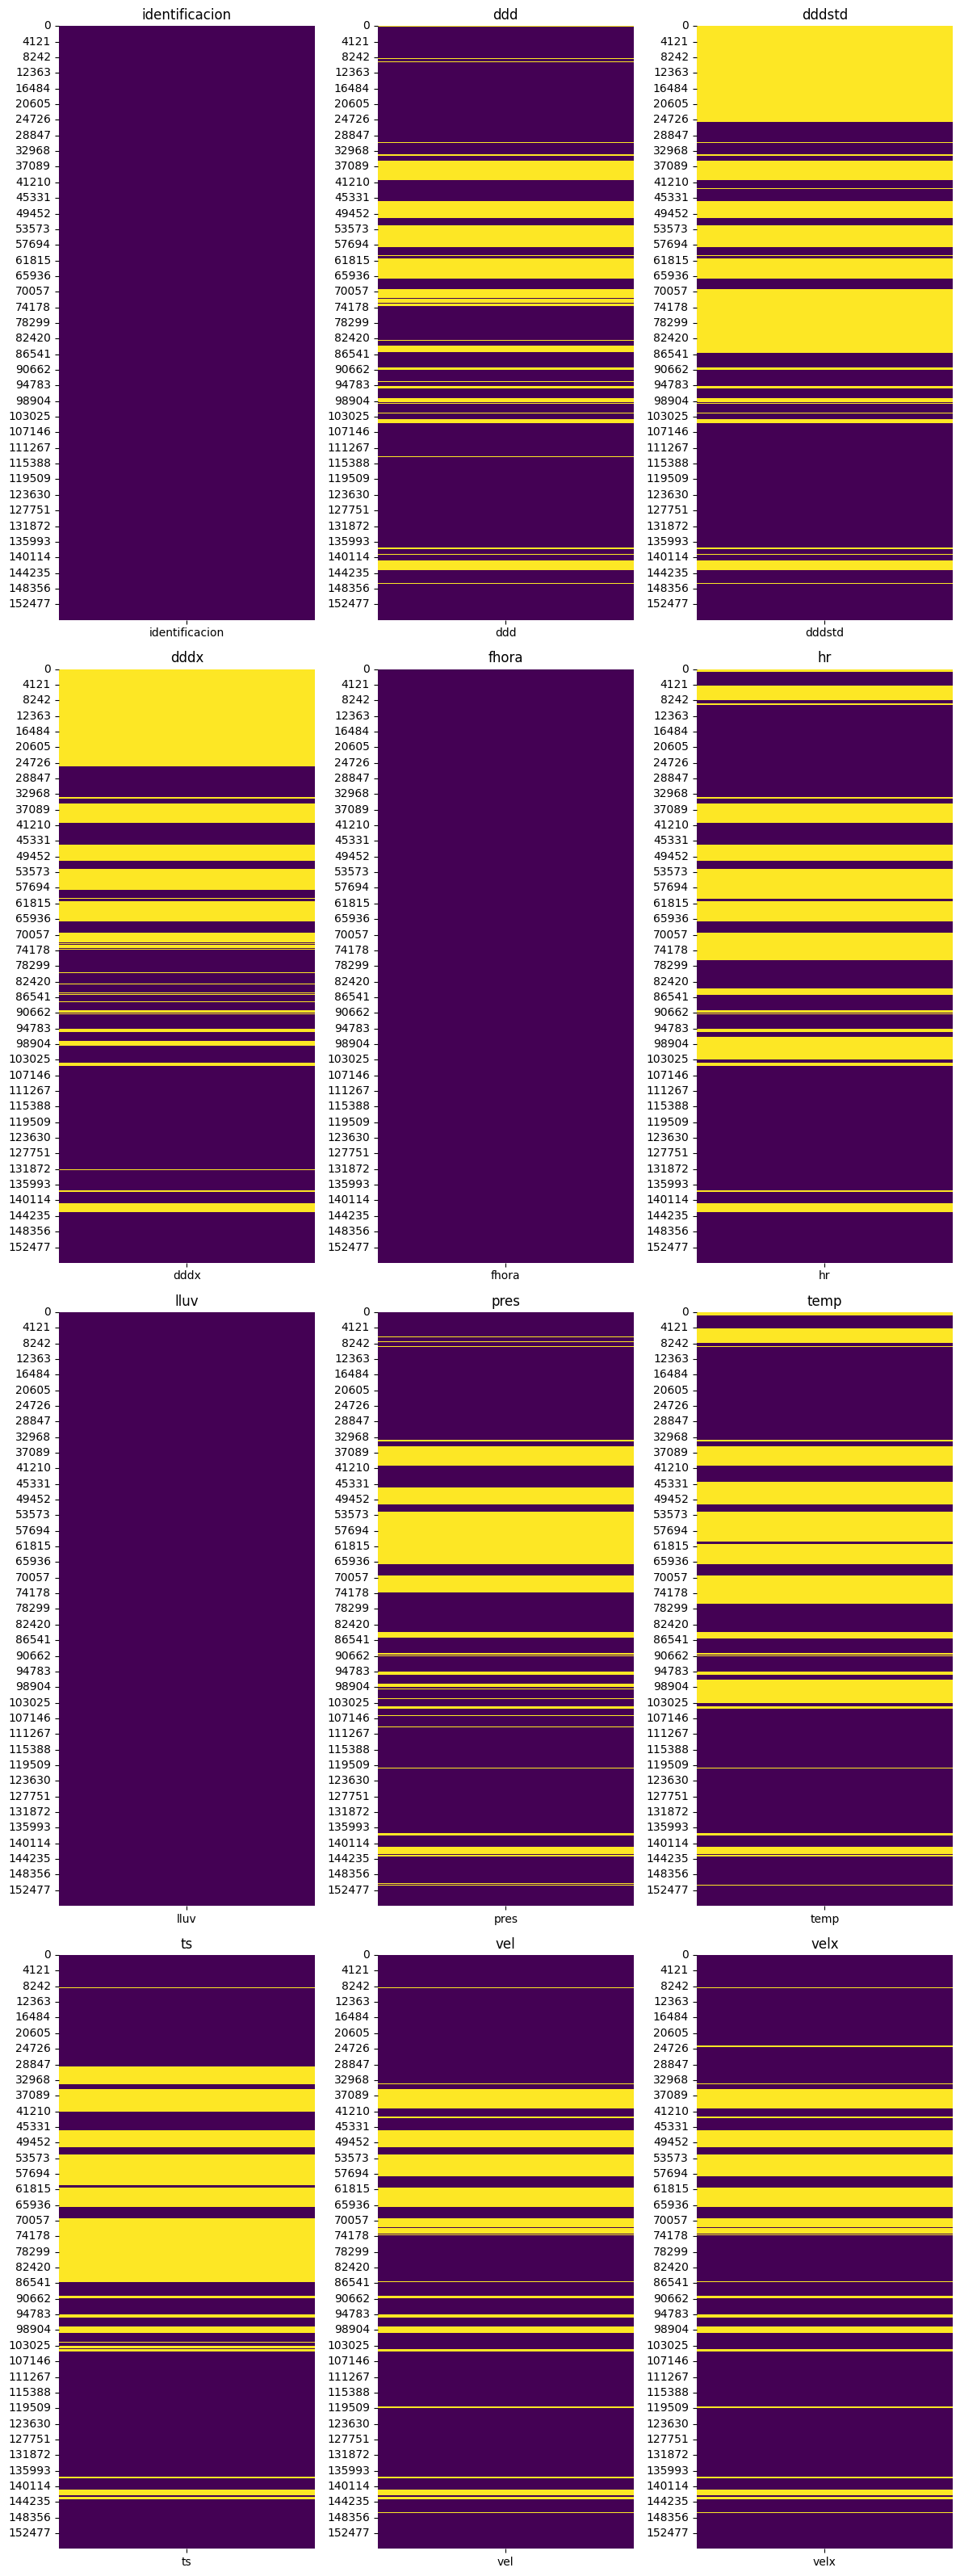

In [19]:
import math

num_cols = len(df_horapunto.columns)
num_rows = math.ceil(num_cols / 3)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 8 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas y generar gráficos
for ax, col in zip(axes, df_horapunto.columns):
    sns.heatmap(df_horapunto[[col]].isnull(), cbar=False, cmap='viridis', ax=ax)
    ax.set_title(col)

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 3
if num_cols % 3:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

## Remuestreo para hacer una media diaria

A partir de aquí no es necesario seguir revisando el código. Lo importante está arriba.

In [22]:
df_horapunto_resample = df_horapunto.resample('D').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(df_horapunto_resample[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

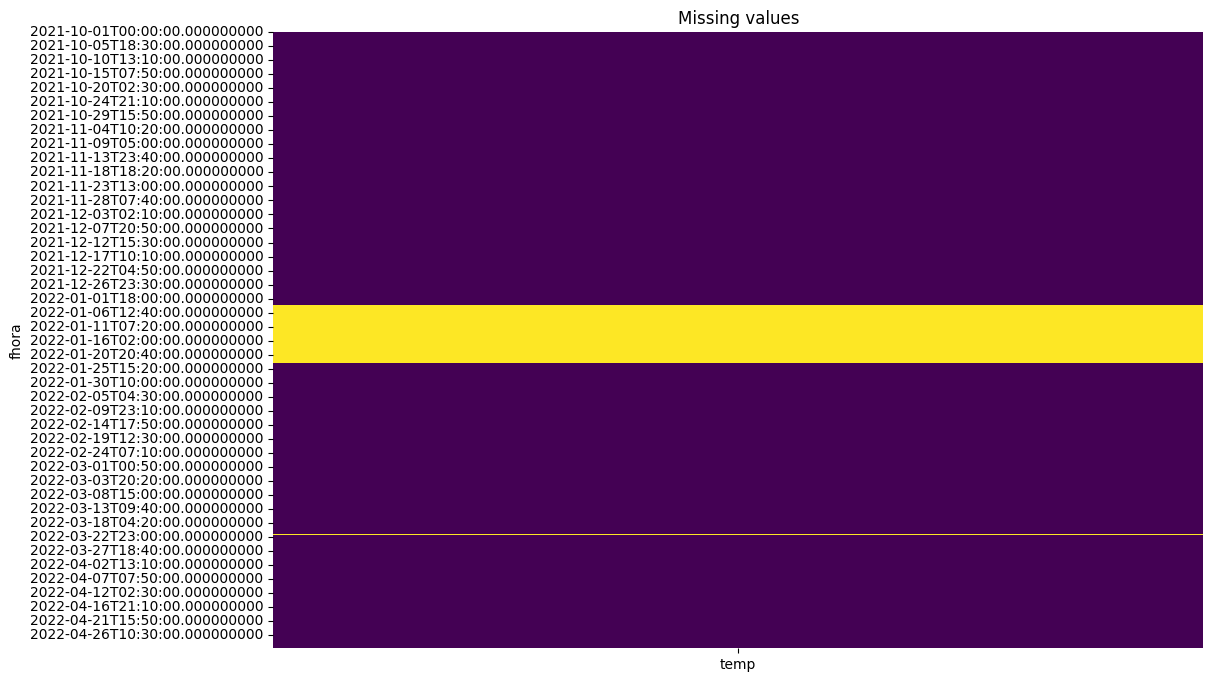

In [ ]:
df_periodo = df_copy[['temp']].loc['2021-10-01':'2022-04-30']

plt.figure(figsize=(12, 8))
sns.heatmap(df_periodo[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

In [ ]:
df_acumulate = df_horapunto.resample('H').sum()
df_horapunto['lluvAcumulada'] = df_acumulate['lluv']
df_periodo = df_horapunto['2021-02-01':'2024-06-30']

df_periodo[['lluvAcumulada', 'lluv']].head(30)

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_acumulate = df_horapunto.resample('H').sum()
C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horapunto['lluvAcumulada'] = df_acumulate['lluv']


,lluvAcumulada,lluv
fhora,,
2021-02-01 00:00:00+00:00,0.1,0.1
2021-02-01 01:00:00+00:00,0.1,0.1
2021-02-01 02:00:00+00:00,0.0,0.0
2021-02-01 03:00:00+00:00,0.0,0.0
2021-02-01 04:00:00+00:00,0.0,0.0
2021-02-01 05:00:00+00:00,0.2,0.2
2021-02-01 06:00:00+00:00,0.0,0.0
2021-02-01 07:00:00+00:00,0.0,0.0
2021-02-01 08:00:00+00:00,0.0,0.0


In [ ]:
correspondence = df_periodo['lluvAcumulada'].eq(df_periodo['lluv'])
correspondence.value_counts()

True     24328
False     2899
Name: count, dtype: int64